In [74]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import torch

Tutorial to download AIA images can be found there: https://docs.sunpy.org/en/stable/generated/gallery/acquiring_data/downloading_cutouts.html


## Usefull function 

### Load data

In [75]:
def load_data():
    data=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv", sep=",")
    data.columns=data.columns.str.strip()
    data=data.drop(columns="velocity")

    return data

### Load image from the given data 

In [78]:
def get_image(data):
    
    dates=data["date"]
    
    for i,date in enumerate(dates):

        start_time = Time(date, scale='utc', format='isot')

        bottom_x=data["basepoint_X_longitude"][i]
        bottom_y=data["basepoint_Y_latitude"][i]

        duration=data["duration"][i]

        bottom_left = SkyCoord(bottom_x*u.arcsec, bottom_y*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
        top_right = SkyCoord((bottom_x+300)*u.arcsec, (bottom_y+300)*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

        jsoc_email = "adrien.joliat@epfl.ch"

        cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)

        query = Fido.search(
            a.Time(start_time , start_time + duration*u.min),
            a.Wavelength(304*u.angstrom),
            a.Sample(5*u.h),
            a.jsoc.Series.aia_lev1_euv_12s,
            a.jsoc.Notify(jsoc_email),
            a.jsoc.Segment.image,
            cutout,
        )
        files = Fido.fetch(query)
        files.sort()
    return files

### Taking array from the file


In [76]:
def array_file(file): #for the moment only designed for one file
    with fits.open(file[0]) as f:
        array=f[1].data
        image_array=np.array(array)
    return image_array

### Plots images (Need improvements !)

In [68]:
def plot(files):
    sequence = sunpy.map.Map(files, sequence=True)

    fig = plt.figure()
    ax = fig.add_subplot(projection=sequence.maps[0])
    ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

## Code exemples

Export request pending. [id=JSOC_20231111_1179, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

c:\Users\Adrien\anaconda3\envs\envADA\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


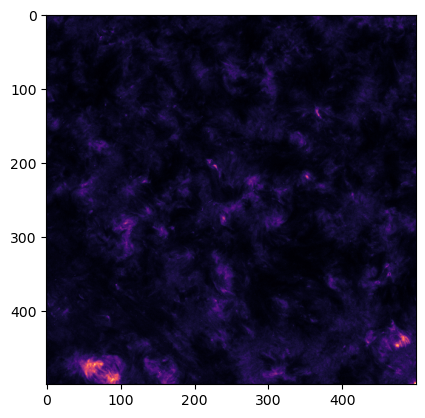

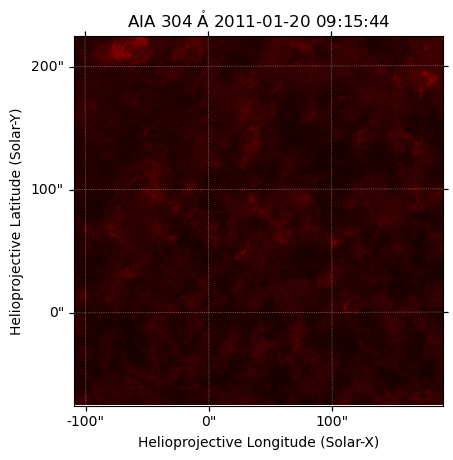

In [81]:
#Exemple with functions
data=load_data()
file=get_image(data[data.index==0])
image_array=array_file(file)

plt.imshow(image_array, cmap="magma")  #just to show the image (need improvements)
plot(file)#plot directly the file

In [67]:
"""
date: 2011-01-20T09:15:44.000000
basepoint_x: -226.577125	
basepoint_y: -956.964375
"""

start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot') 
bottom_left = SkyCoord(-326*u.arcsec, -1057*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right =SkyCoord(-126*u.arcsec, -857*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

#print(os.environ)
jsoc_email = "adrien.joliat@epfl.ch"

query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(3*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)

print(query)

files = Fido.fetch(query)
files.sort()

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105


Export request pending. [id=JSOC_20231111_992, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_992, status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-01-20T081538Z.304.image.fits:   0%|          | 0.00/104k [00:00<?, ?B/s]

Results from 1 Provider:

3 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T09:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T10:15:38Z  SDO/AIA    AIA_4      304    2106


Export request pending. [id=JSOC_20231111_1117, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1117, status=1]
Waiting for 5 seconds...
3 URLs found for download. Full request totalling 28MB


Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-01-20T081546Z.304.image_lev1.fits:   0%|          | 0.00/9.71M [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T091546Z.304.image_lev1.fits:   0%|          | 0.00/9.73M [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-01-20T101546Z.304.image_lev1.fits:   0%|          | 0.00/9.80M [00:00<?, ?B/s]

c:\Users\Adrien\anaconda3\envs\envADA\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


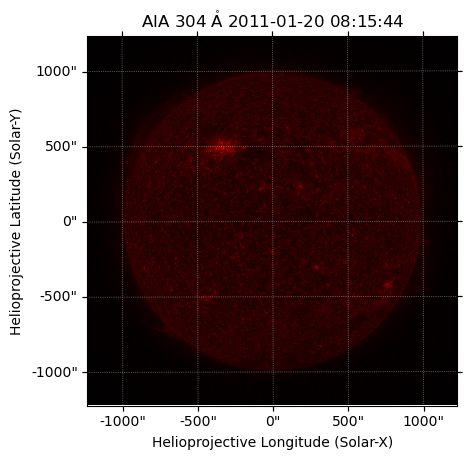

In [70]:
start_time = Time('2011-01-20T09:15:44.000000', scale='utc', format='isot')
bottom_left = SkyCoord(-1000*u.arcsec, -1000*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
#top_right = SkyCoord(-500*u.arcsec, -500*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
#cutout = a.jsoc.Cutout(bottom_left, tracking=True)
jsoc_email = "adrien.joliat@epfl.ch"
query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(1*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    #cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()
plot(files)

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-20 08:15:44
Exposure Time:		 2.902184 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.60016501 0.60016501] arcsec / pix
Reference Pixel:	 [2053.22998 2037.20996] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-1,  0,  1, ...,  0, -1,  0],
       [-1,  1,  0, ...,  0,  0,  0],
       [ 0,  0, -1, ..., -1,  1,  2],
       ...,
       [ 1,  0,  1, ..., -2, -2,  1],
       [ 0,  0,  0, ...,  1, -1, -1],
       [ 0, -1,  1, ...,  1, -2,  1]], dtype=int16)


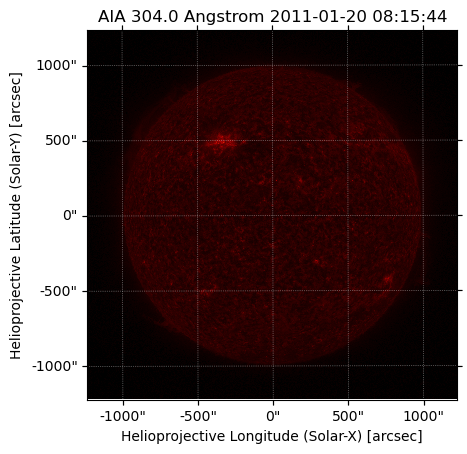

In [71]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
print(sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

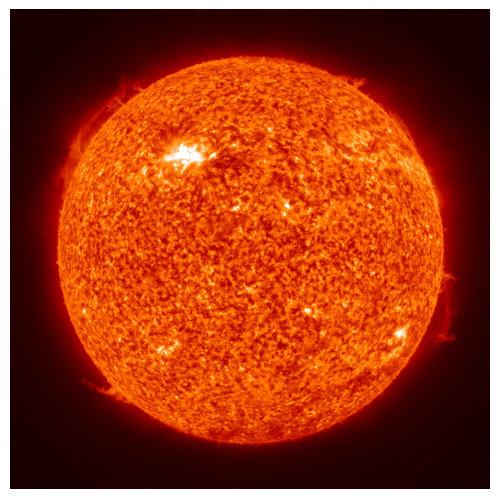

In [73]:
import numpy as np
smap = sunpy.map.Map(files[0])
figure = plt.figure(frameon=False)
ax = plt.axes([0, 0, 1, 1])
# Disable the axis
ax.set_axis_off()

# Plot the map.
# Since we are not interested in the exact map coordinates,
# we can simply use :meth:`~matplotlib.Axes.imshow`.
norm = smap.plot_settings['norm']
norm.vmin, norm.vmax = np.percentile(smap.data, [1, 99.9])
ax.imshow(smap.data,
          norm=norm,
          cmap=smap.plot_settings['cmap'],
          origin="lower")